# Problem Statement:
The problem involves the analysis and prediction of two key aspects related to restaurants in various cities around the world using the Zomato dataset:

Average Cost for Two Prediction: Develop a predictive model to estimate the average cost for two people when dining at a restaurant. This is a regression problem where the model should predict a numerical value representing the average cost.

Price Range Prediction: Create a predictive model to forecast the price range of food at a restaurant. The price range can be categorical (e.g., low, medium, high), and this is also a classification problem where the model should classify restaurants into the appropriate price range category.

Type of Problems:

Average Cost for Two Prediction:

Type: Regression Problem
Objective: The goal is to build a machine learning model that can predict the average cost for two people at a restaurant based on various features such as restaurant location, cuisine, table booking, online delivery, ratings, and more. The predicted cost will be a numerical value.
Price Range Prediction:

Type: Classification Problem
Objective: The objective is to develop a machine learning model that can categorize restaurants into different price range categories (e.g., low, medium, high) based on features such as average cost, location, cuisine, and other restaurant attributes. The predicted price range will be a categorical label.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Data Sets

In [6]:
df = pd.read_csv('zomato1.csv', encoding='iso-8859-1')

In [7]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [9]:
dfcode=pd.read_excel("Country-Code.xlsx")

In [10]:
dfcode.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [11]:
dfall = pd.merge(df, dfcode, how='inner', on ='Country Code')

In [12]:
dfall.sample(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
8937,18382564,Twomato Foods,1,Noida,"B-65, 1st Floor, Sector 67, Near Sector 65, Noida",Sector 65,"Sector 65, Noida",77.380365,28.607233,North Indian,...,No,Yes,No,No,1,3.2,Orange,Average,11,India
3215,307500,The Sweet Boutique,1,New Delhi,"D-30, 3rd Floor, Defence Colony, New Delhi",Defence Colony,"Defence Colony, New Delhi",77.236840,28.572495,Bakery,...,No,No,No,No,1,3.3,Orange,Average,25,India
7235,313494,Bharat Sweet House,1,New Delhi,"AB-9, Opposite MTNL Office, Shalimar Bagh, New...",Shalimar Bagh,"Shalimar Bagh, New Delhi",77.168571,28.706773,Mithai,...,No,No,No,No,1,3.2,Orange,Average,8,India
1458,18462584,The Lost Mughal,1,Gurgaon,"DT Mega Mall, Golf Course Road, A Block, Secto...","DT Mega Mall, DLF Phase 1","DT Mega Mall, DLF Phase 1, Gurgaon",77.093352,28.475652,"North Indian, Mughlai, Biryani",...,No,Yes,No,No,2,3.8,Yellow,Good,43,India
9515,5801321,Cafe Beverly,191,Colombo,"475/C, Sri Jayawardenapura Mawatha, Welikada, ...","Rajagiriya, Colombo","Rajagiriya, Colombo, Colombo",79.902941,6.906815,"Continental, American",...,No,No,No,No,3,4.1,Green,Very Good,58,Sri Lanka
9457,6501534,Cube - Tasting Kitchen,189,Inner City,"24 Albrecht Road, Maboneng Precinct, City and ...",City and Suburban,"City and Suburban, Inner City",28.060192,-26.203278,"European, Contemporary",...,No,No,No,No,4,4.9,Dark Green,Excellent,441,South Africa
2319,1400544,JAL - A Jungle Restaurant,1,Indore,"Behind Pushp Kunj Hospital, Khandwa Road, Bhaw...",Bhawar Kuan,"Bhawar Kuan, Indore",75.881991,22.651847,"North Indian, Chinese",...,No,No,No,No,3,4.1,Green,Very Good,100,India
9420,6201309,MRA Bakery Sweets & Restaurant,166,Doha,"Opposite Aster Pharmacy, Al Taei Street, Al Gh...",Al Ghanim,"Al Ghanim, Doha",51.536923,25.280223,"Kerala, Indian, Chinese, Bakery",...,No,No,No,No,3,4.0,Green,Very Good,322,Qatar
4437,305293,Uncle Xpress,1,New Delhi,"1, Krishna Market, Near Desh Bandhu College, K...",Kalkaji,"Kalkaji, New Delhi",77.255394,28.541660,Chinese,...,No,Yes,No,No,1,3.4,Orange,Average,80,India
7659,18401212,Chinese Chatorey Xpress,1,New Delhi,"G-1/66 Dalmill Road, Uttam Nagar, New Delhi",Uttam Nagar,"Uttam Nagar, New Delhi",77.071526,28.620512,"Chinese, North Indian, Fast Food",...,No,Yes,No,No,1,0.0,White,Not rated,2,India


In [13]:
df.shape

(9551, 21)

In [14]:
dfall.shape

(9551, 22)

    *************Merging of Country code in the Primary Data Sucesfull***********

In [15]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [17]:
dfall.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [18]:
dfall.drop(['Restaurant ID',],axis=1,inplace=True)

In [19]:
dfall.drop(['Switch to order menu',],axis=1,inplace=True)

                  Dropped Restaurant_ID and Switch to order menu as they are irrelevent

## EDA

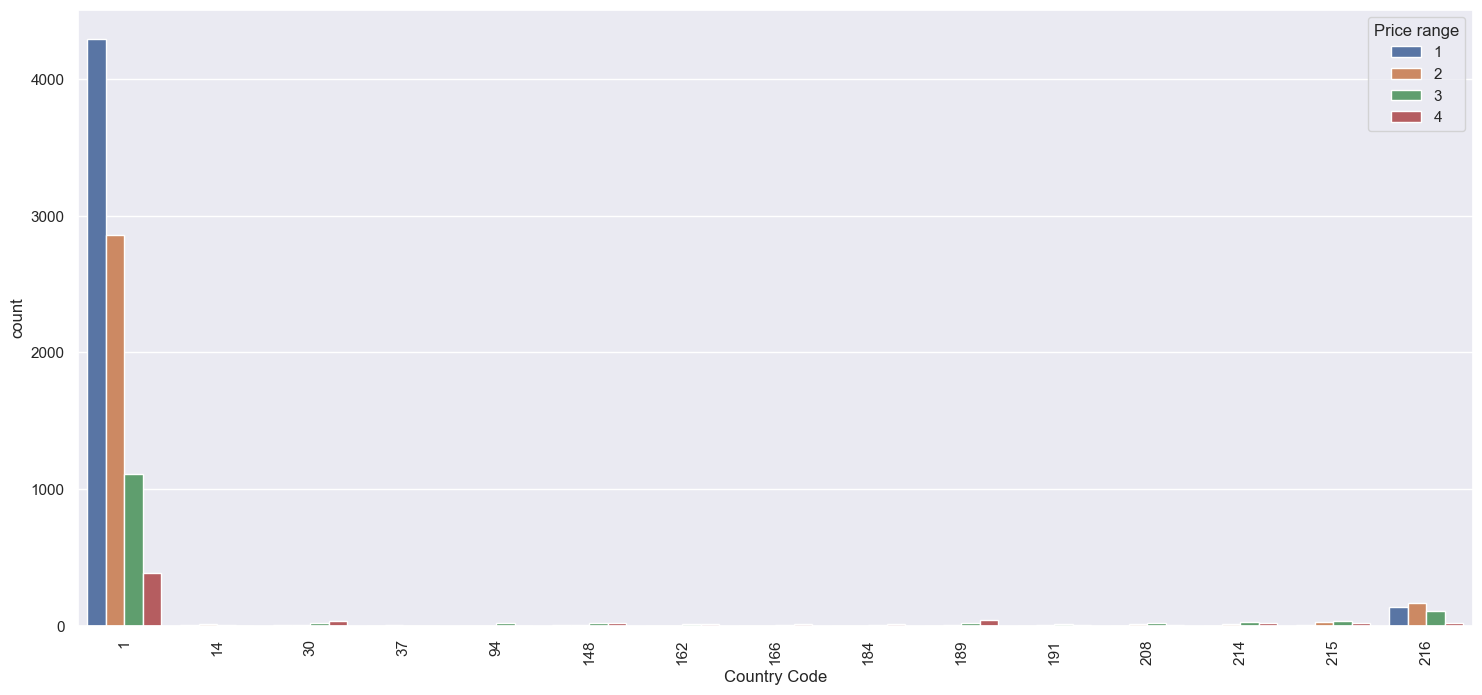

In [22]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(x='Country Code', hue='Price range', data=dfall)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Country Code', ylabel='count'>

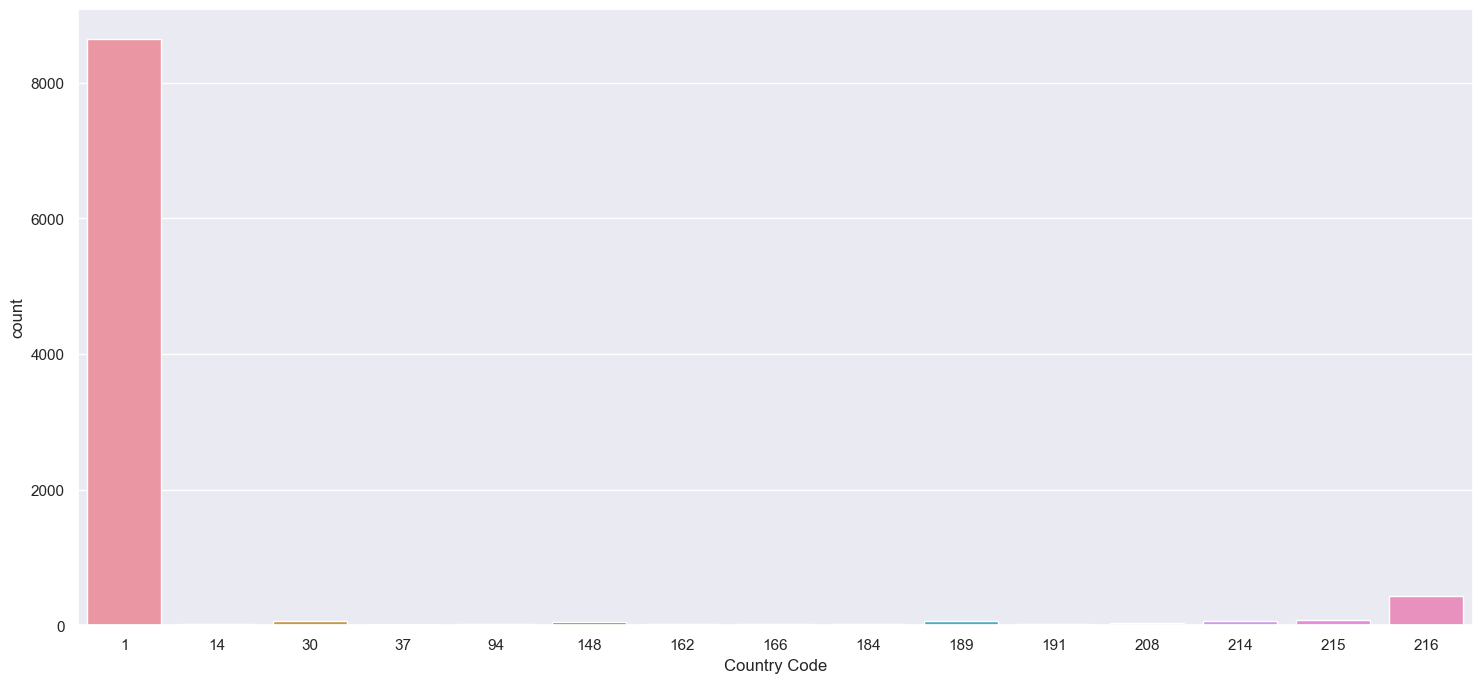

In [24]:
sns.countplot(data=dfall, x='Country Code')

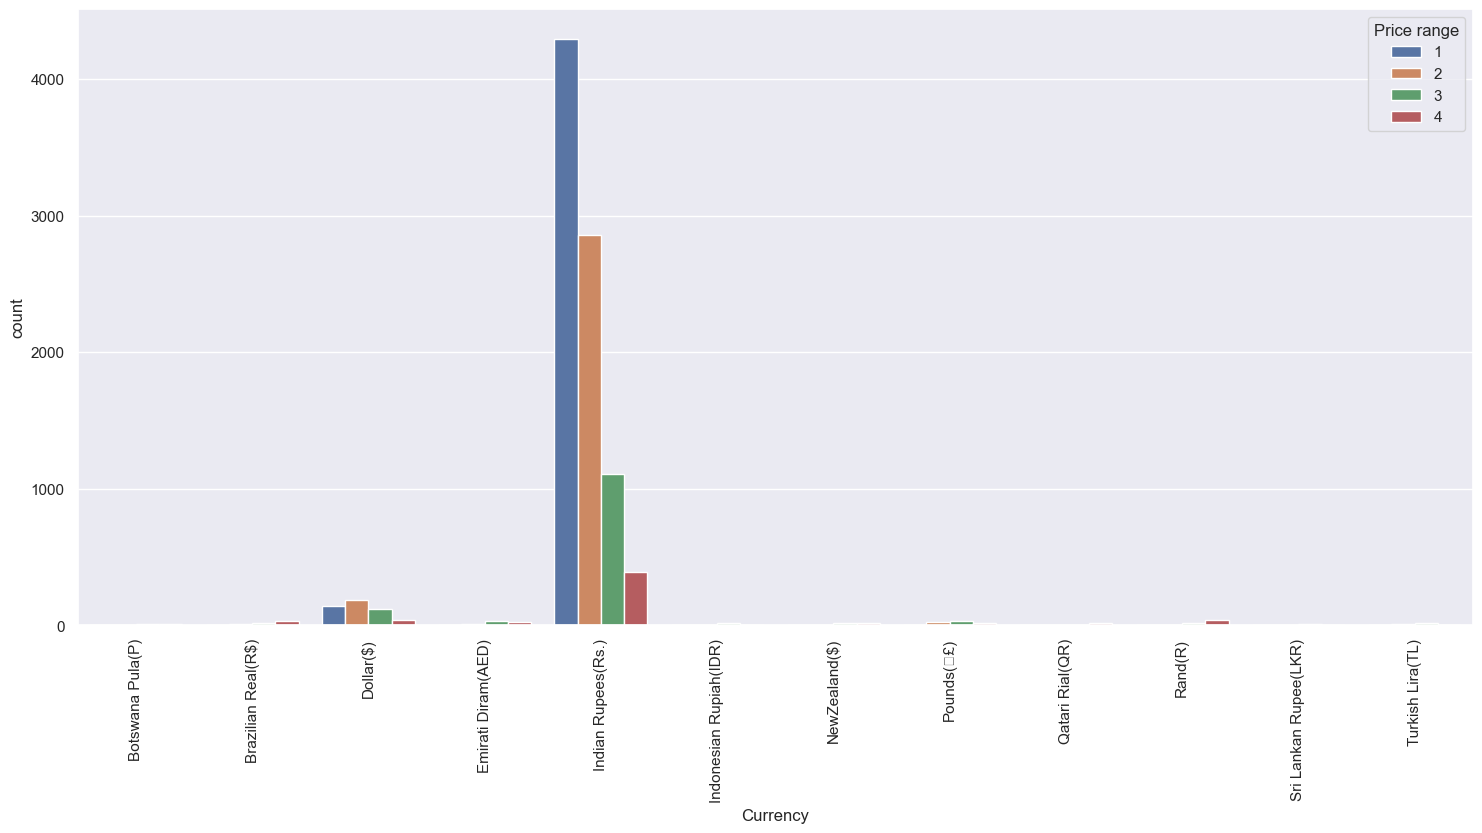

In [25]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(x='Currency', hue='Price range', data=dfall)
plt.xticks(rotation=90)
plt.show()

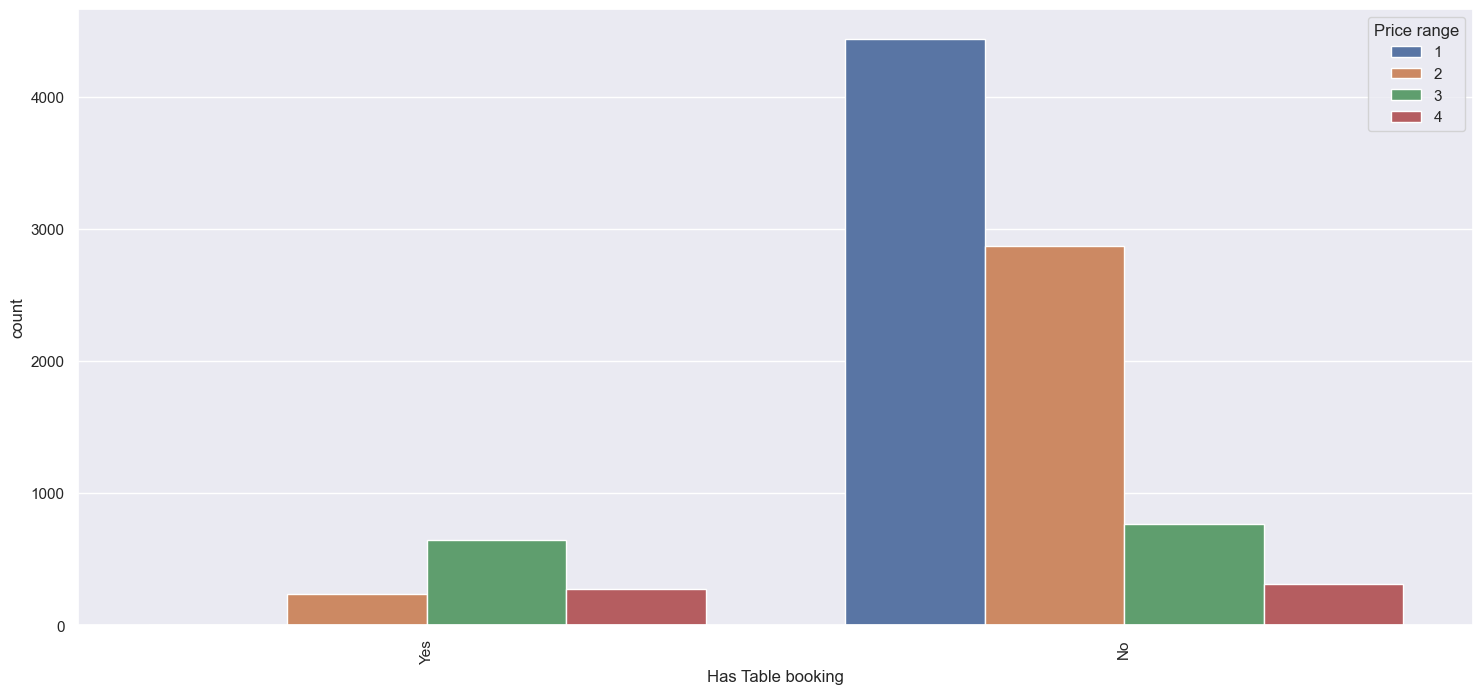

In [27]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(x='Has Table booking', hue='Price range', data=dfall)
plt.xticks(rotation=90)
plt.show()

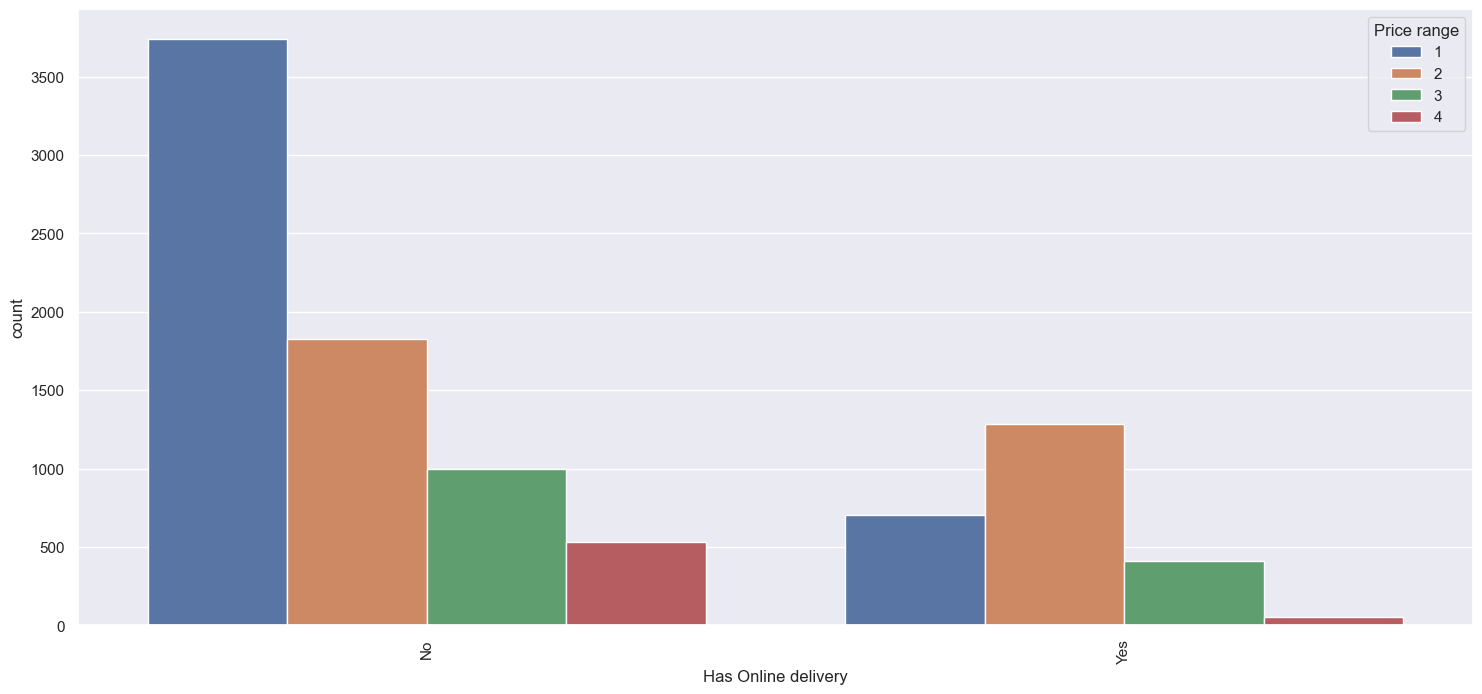

In [29]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(x='Has Online delivery', hue='Price range', data=dfall)
plt.xticks(rotation=90)
plt.show()

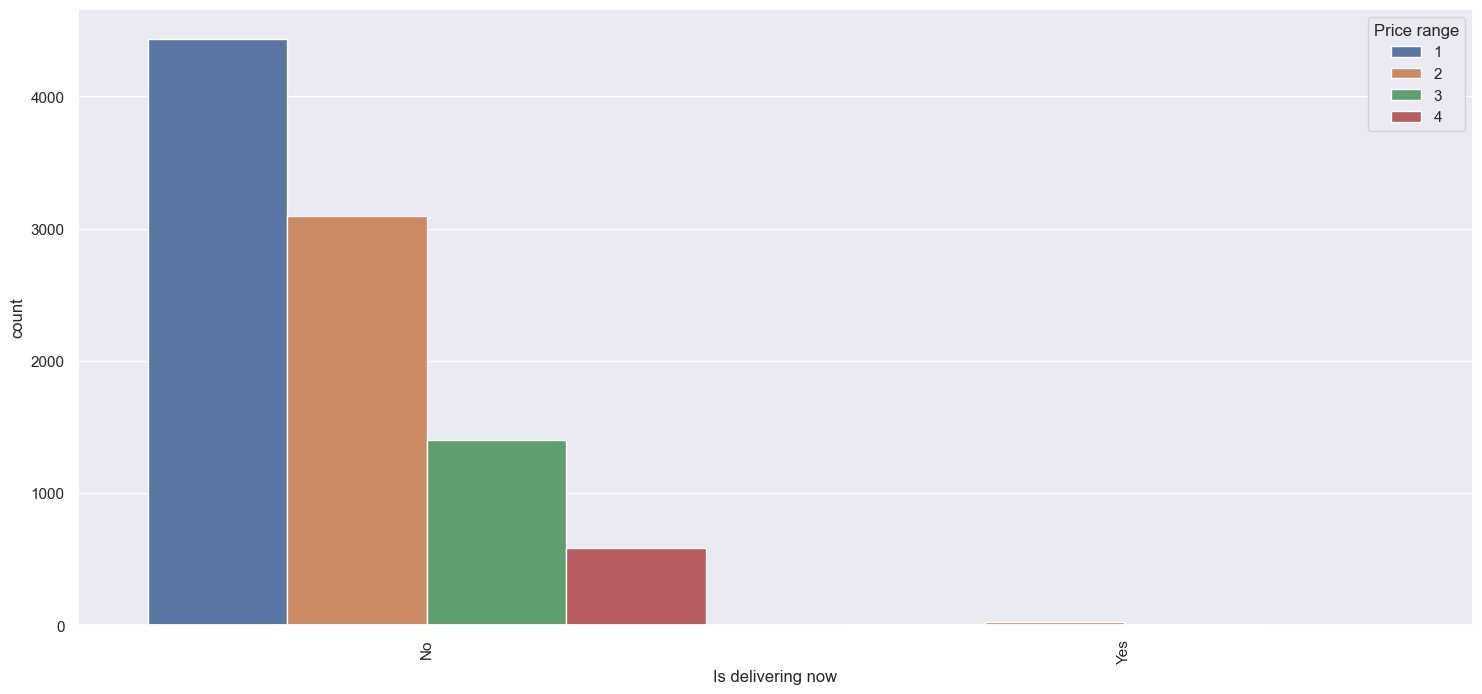

In [30]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(x='Is delivering now', hue='Price range', data=dfall)
plt.xticks(rotation=90)
plt.show()

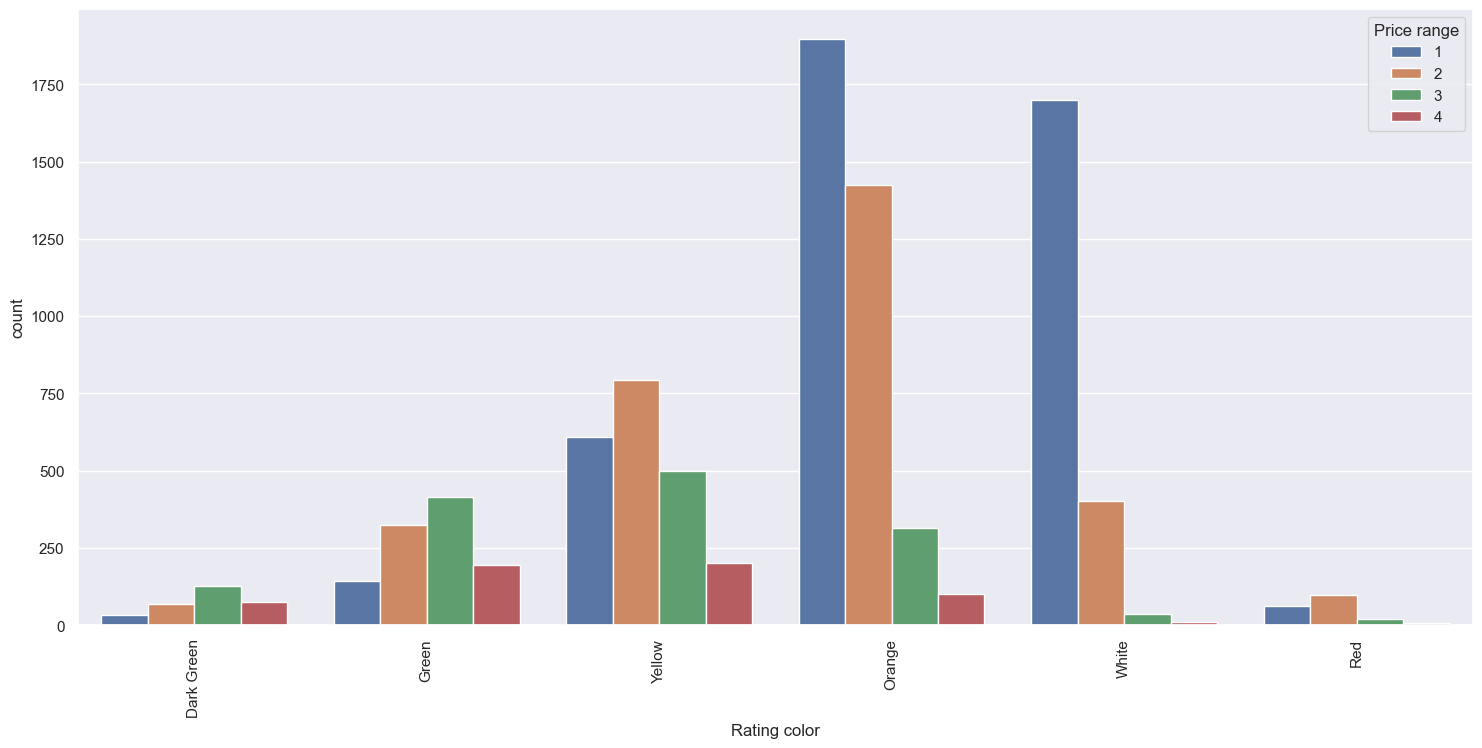

In [31]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(x='Rating color', hue='Price range', data=dfall)
plt.xticks(rotation=90)
plt.show()

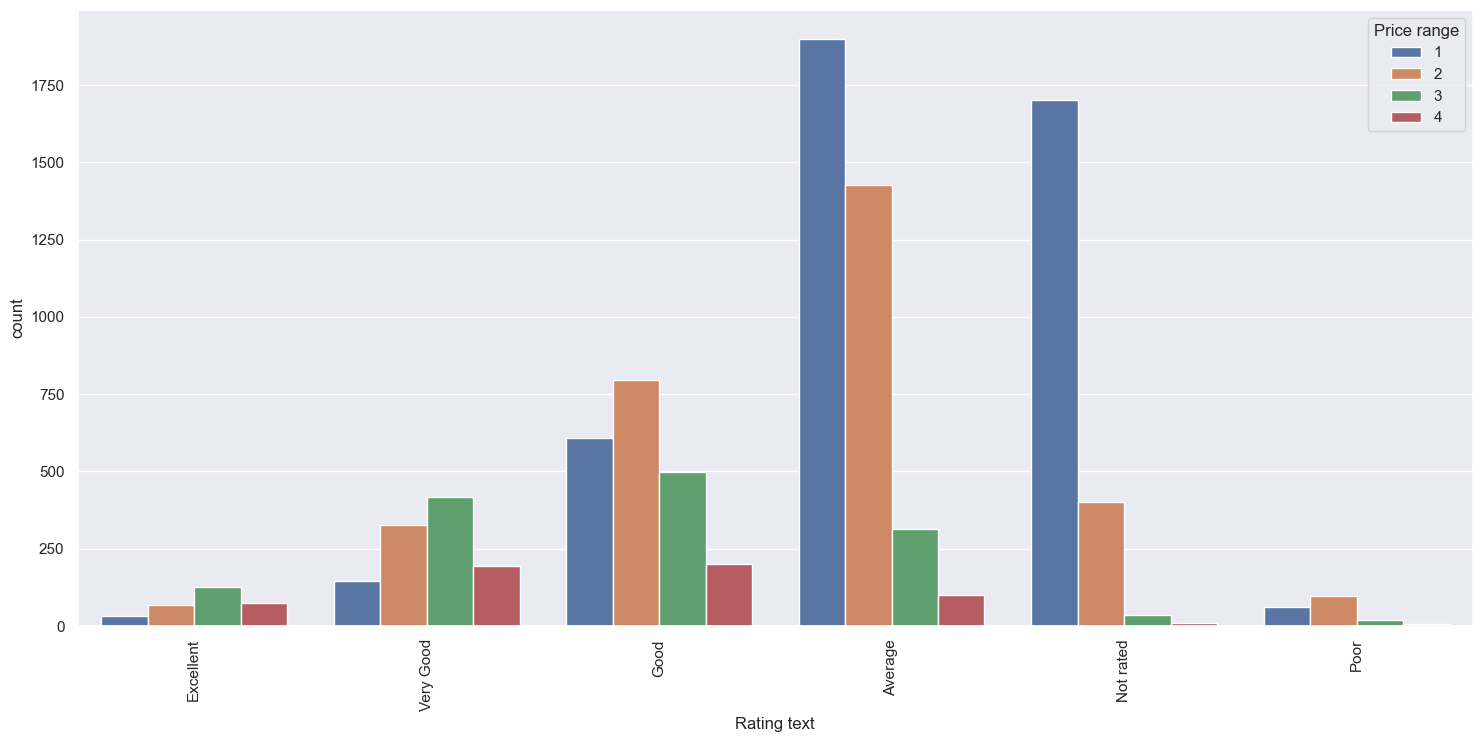

In [32]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(x='Rating text', hue='Price range', data=dfall)
plt.xticks(rotation=90)
plt.show()

## Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
dfall.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [35]:
dfall.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [37]:
lobject=['Restaurant Name','City', 'Address', 'Locality',
       'Locality Verbose','Cuisines',
       'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now',
        'Rating color', 'Rating text','Country']

In [38]:
for i in lobject:
    dfall[i]=le.fit_transform(dfall[i])

In [39]:
dfall.dtypes

Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

                        Label Encoding done Sucessfully

## Distribution

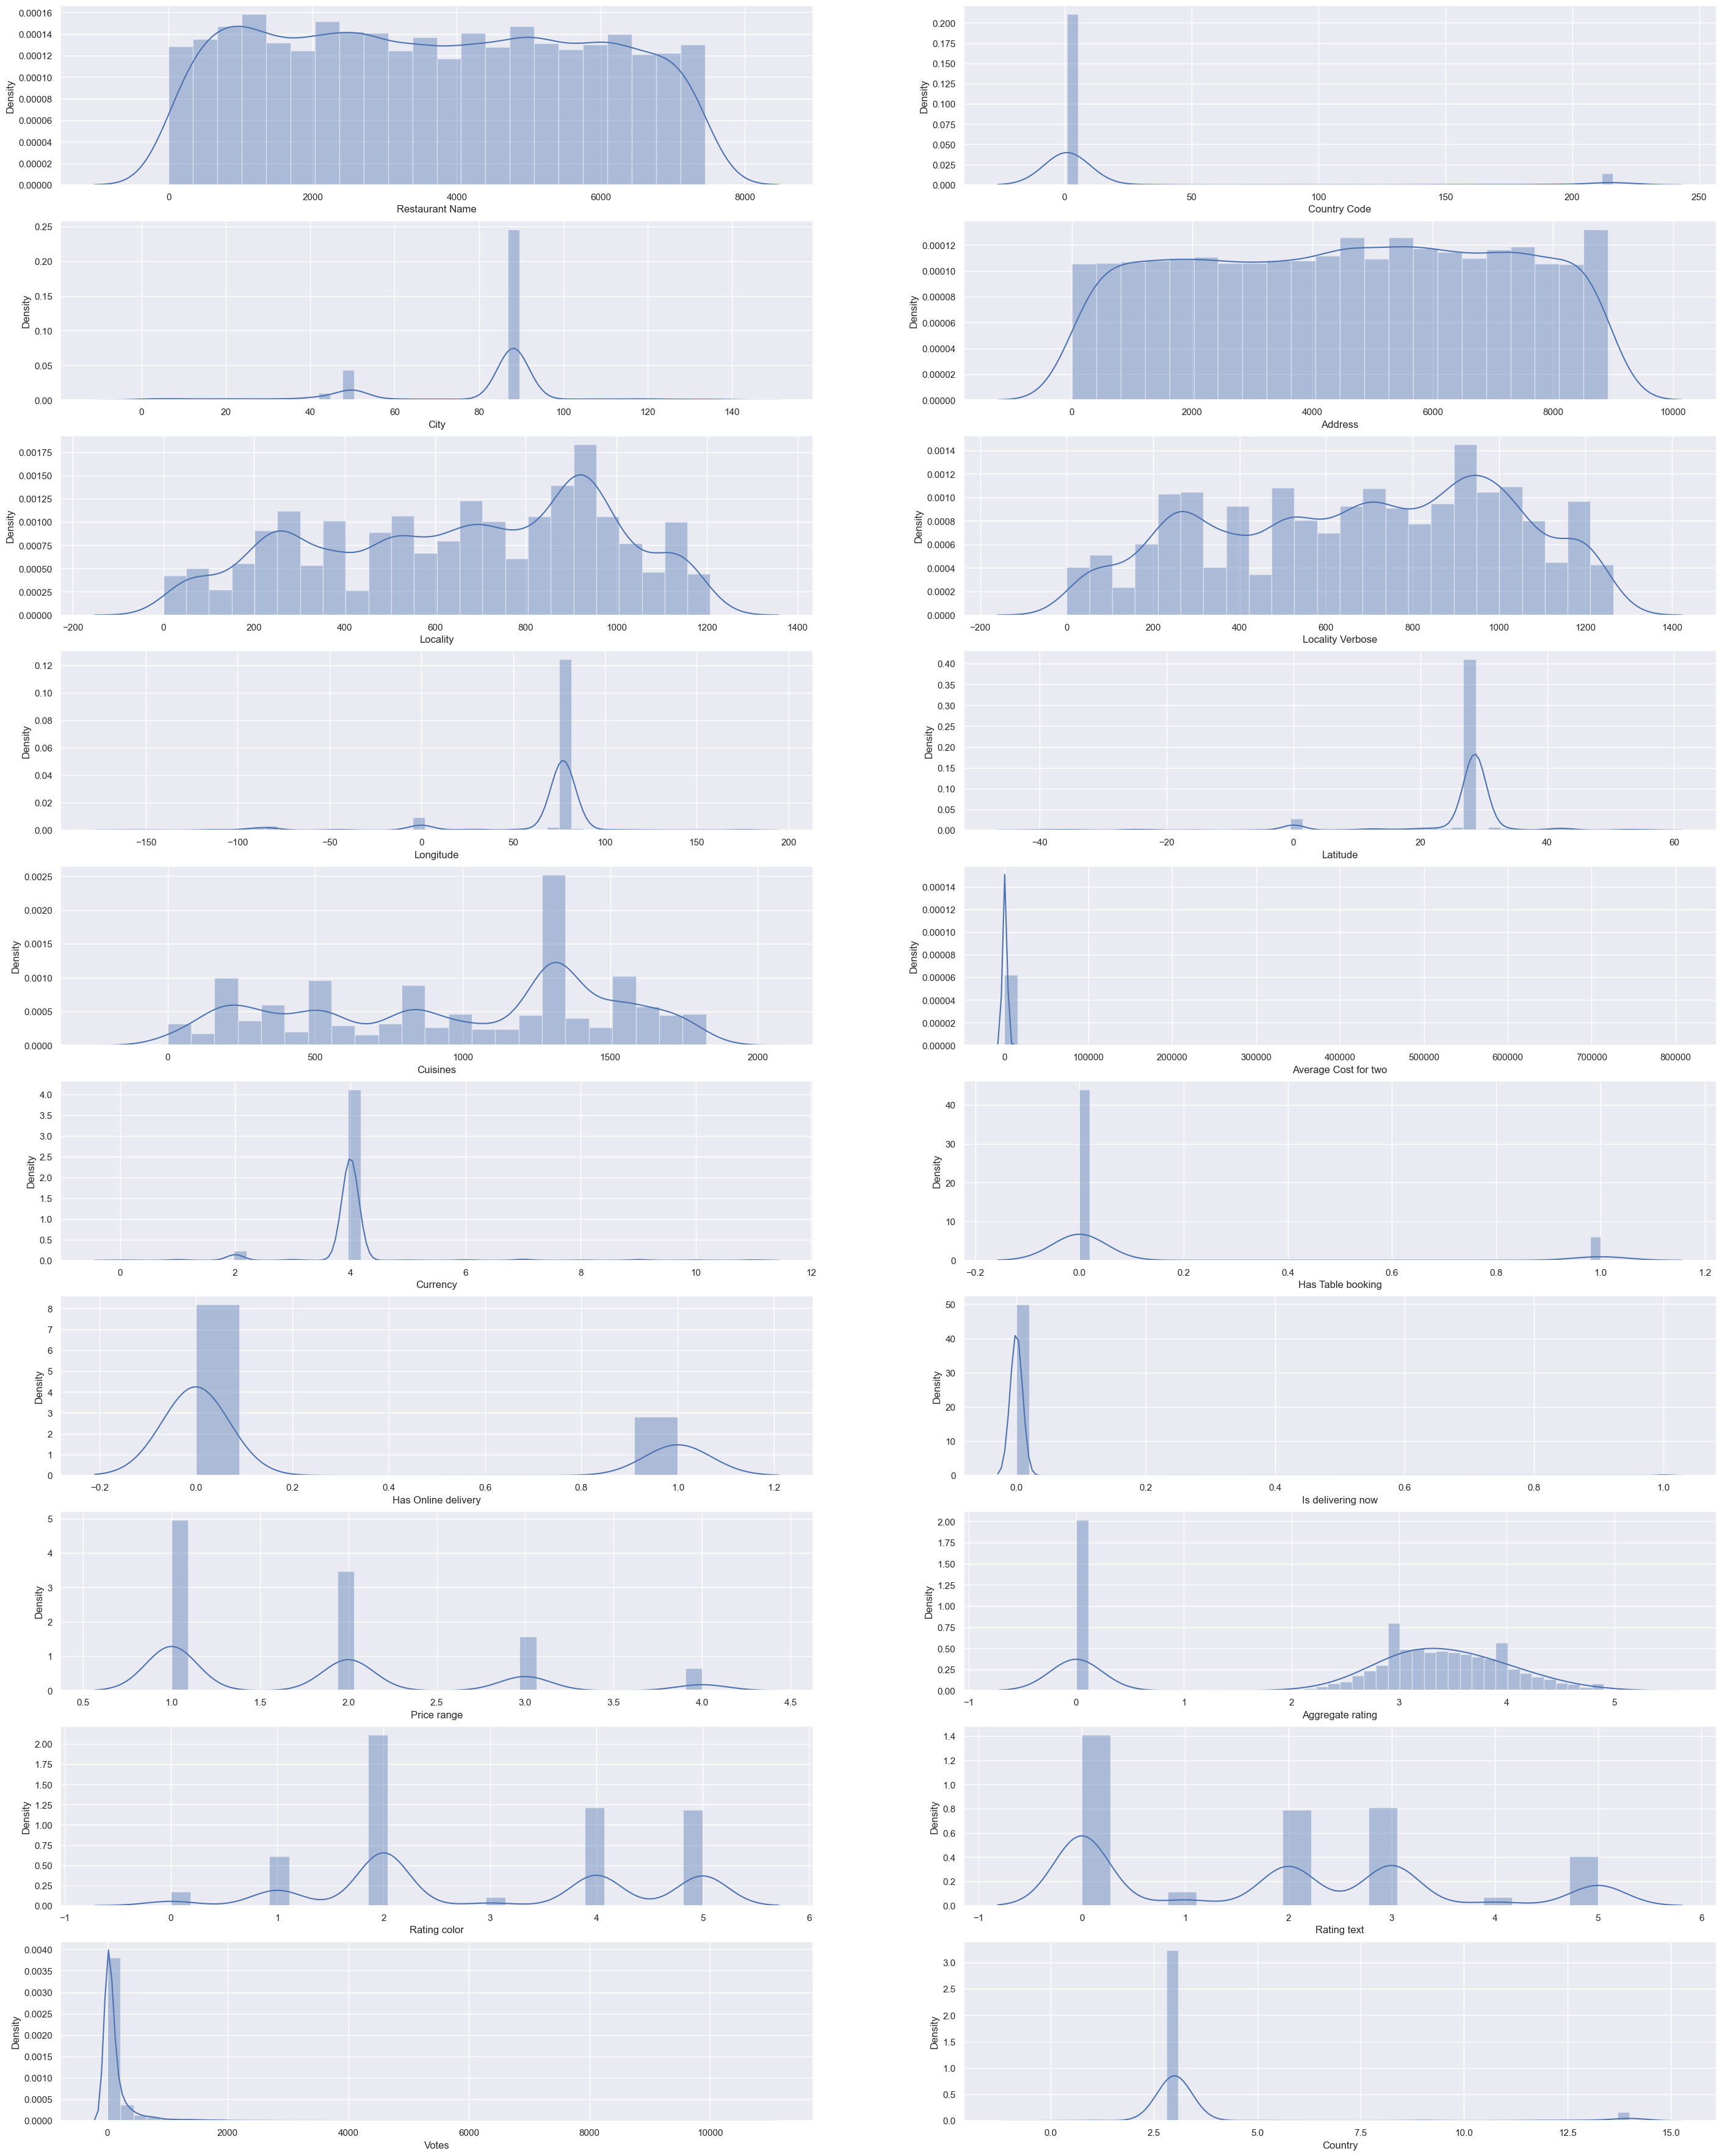

In [40]:
plt.figure(figsize=(35,45))
count =1
for column in dfall:
    if count <= 20:
        ax = plt.subplot(10,2,count)
        sns.distplot(dfall[column])
        plt.xlabel(column) 
    count+=1
plt.show()

                    Skewness is Present in Multiple Columns

## Descriptive Analysis

In [41]:
dfall.describe()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


                                Outliers are Present

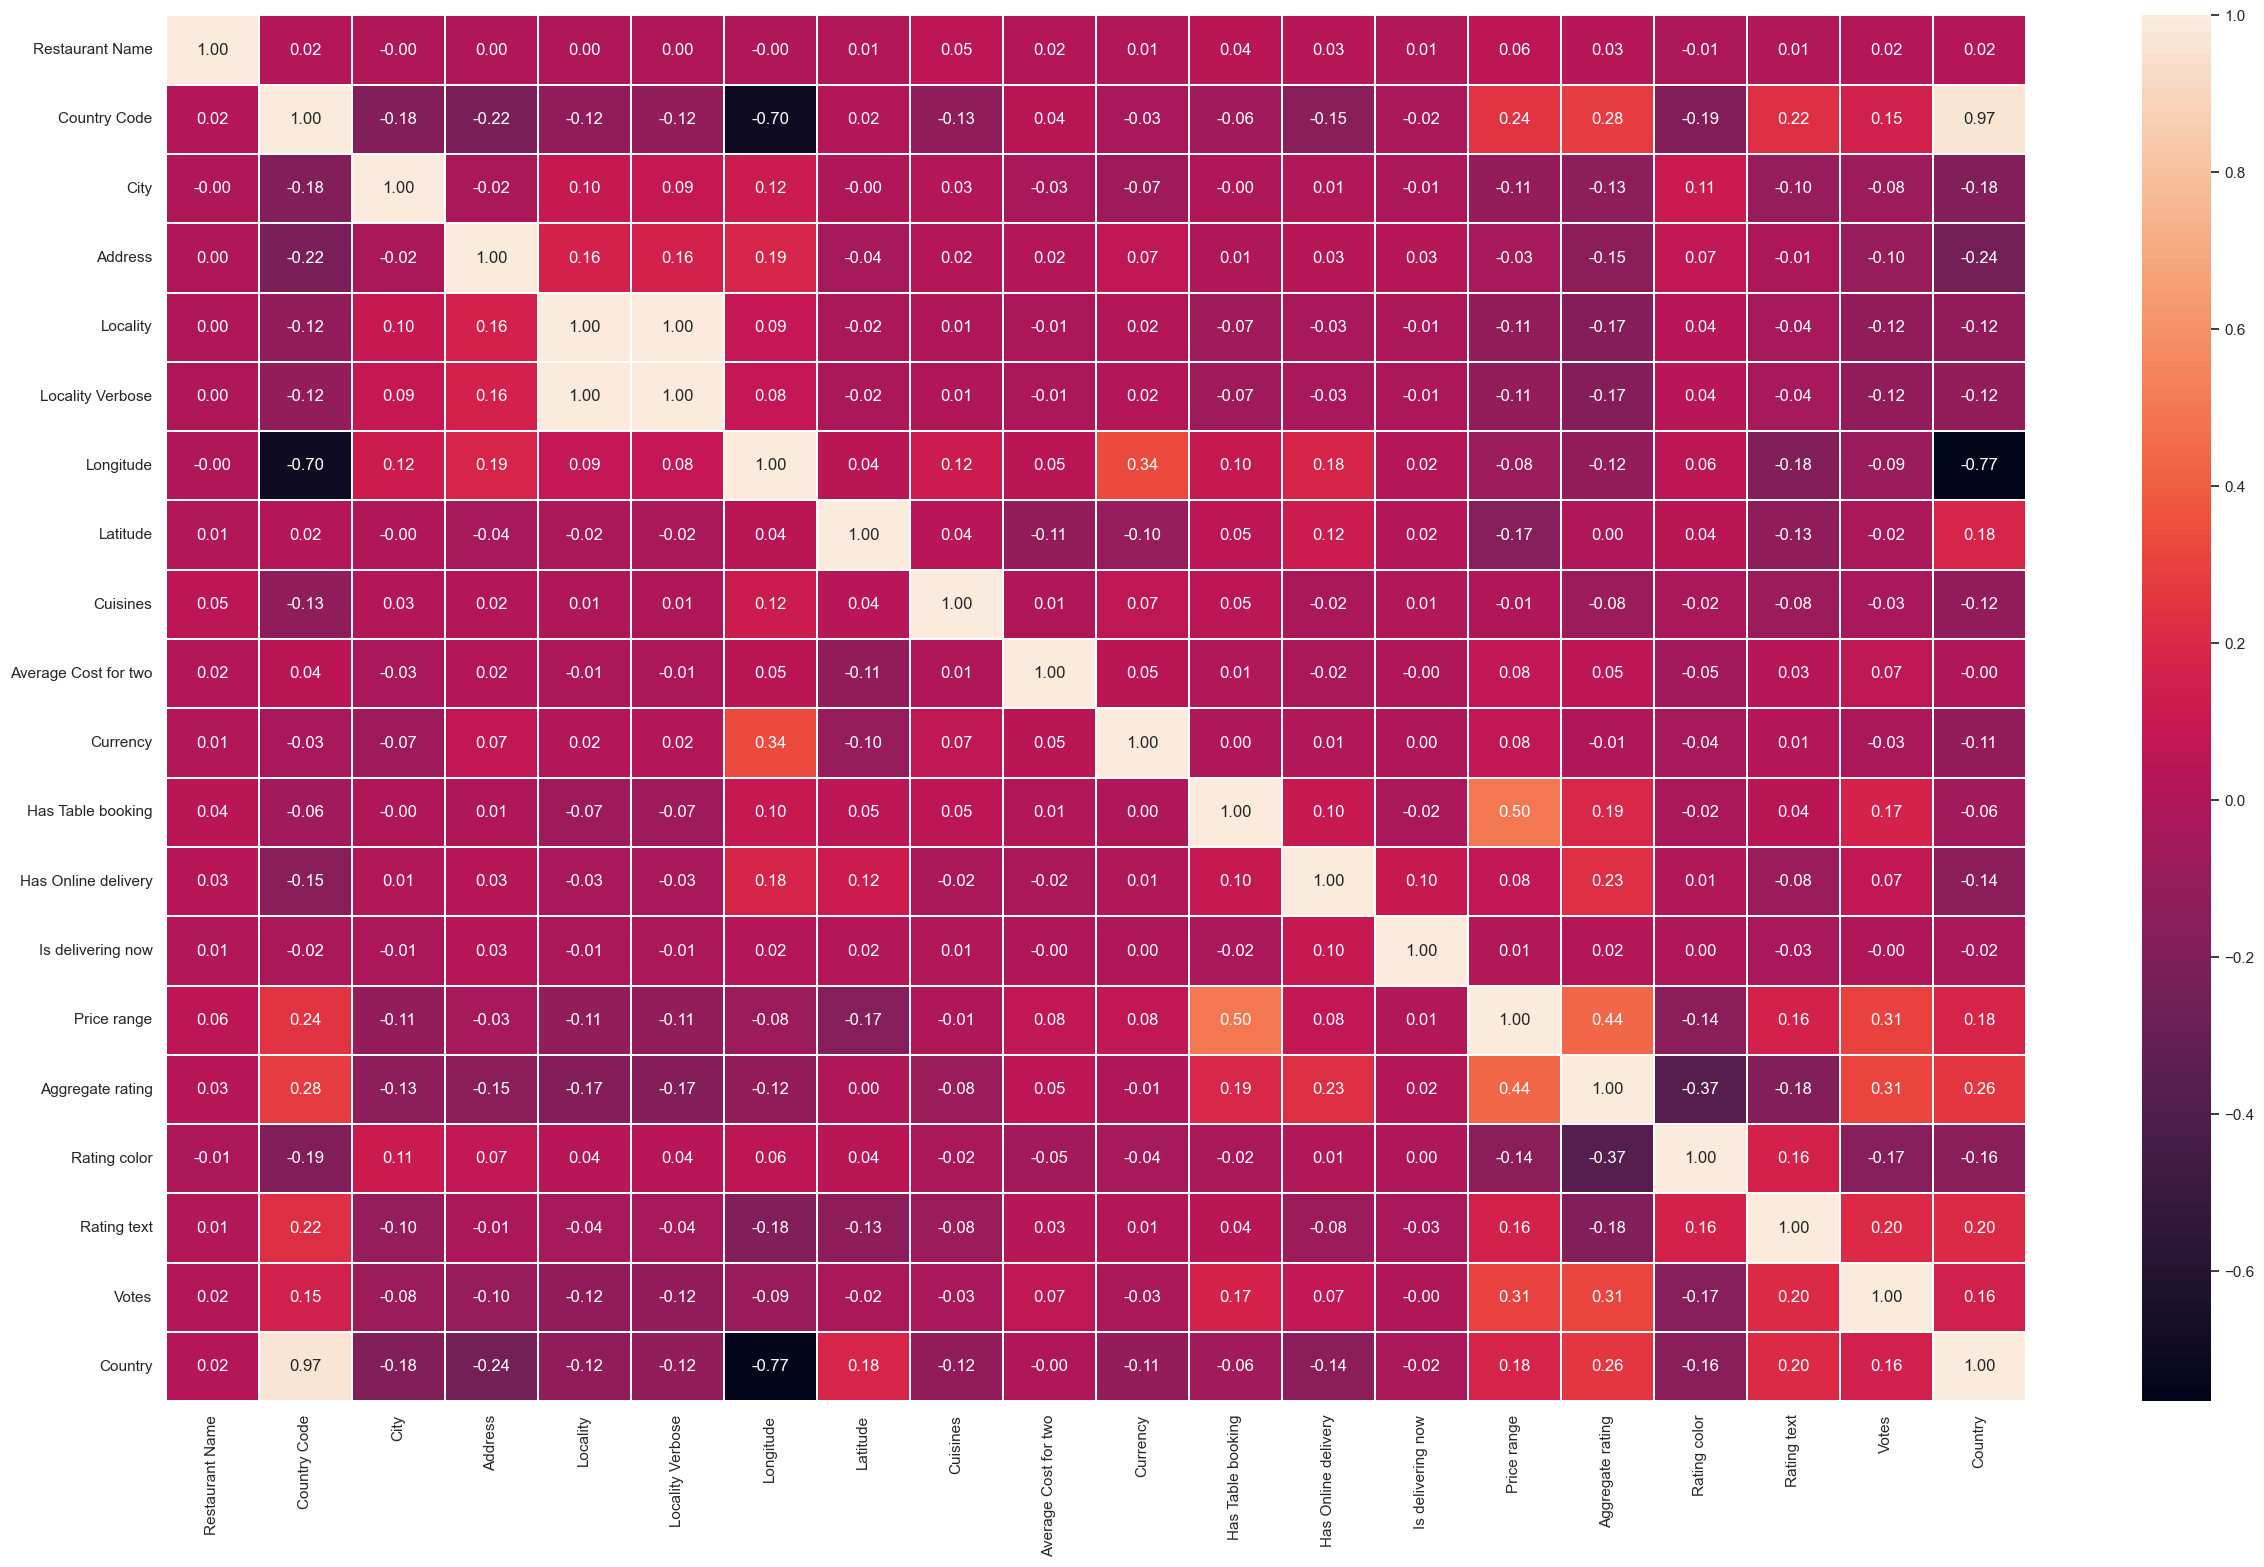

In [42]:
plt.figure(figsize=(30,18))
sns.heatmap(dfall.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [43]:
dfall.corr()['Price range'].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Locality               -0.114459
Locality Verbose       -0.112313
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005489
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Name: Price range, dtype: float64

In [44]:
dfall.drop(["Locality Verbose"],axis=1,inplace=True)

### Managing Outliers

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(dfall))
np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([9, 9, 9, ..., 9, 1, 9], dtype=int64))

In [46]:
dfnew=dfall[(z<3).all(axis=1)]

In [47]:
dfnew.shape

(8408, 19)

In [48]:
dfall.shape

(9551, 19)

                Outliers Managed with 11% loss of Data

In [49]:
dfall['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

            The Data is Having Imbalance and will require Balancing

### SMOTE Technique to be Used

In [50]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [51]:
x=dfnew.drop(["Price range"],axis=1)
y=dfnew["Price range"]

In [52]:
trainx,trainy=smt.fit_resample(x,y)

In [53]:
trainx.shape

(17076, 18)

### Managing Skewness

In [54]:
trainx.skew().sort_values()

Currency                -9.758959
Longitude               -3.810378
Latitude                -2.964208
Aggregate rating        -1.468351
City                    -1.013394
Cuisines                -0.396108
Locality                -0.168257
Address                 -0.132281
Restaurant Name         -0.010821
Is delivering now        0.000000
Rating color             0.131431
Rating text              0.498623
Has Table booking        1.193149
Has Online delivery      1.607716
Average Cost for two     1.766109
Votes                    2.583760
Country Code            10.834284
Country                 11.374893
dtype: float64

In [55]:
list=['Currency','Country Code','Country']

In [56]:
for i in list:
    if trainx.skew().loc[i]>0.5:
        trainx[i]=np.log1p(trainx[i])

In [57]:
trainx.skew().sort_values()

Currency                -9.758959
Longitude               -3.810378
Latitude                -2.964208
Aggregate rating        -1.468351
City                    -1.013394
Cuisines                -0.396108
Locality                -0.168257
Address                 -0.132281
Restaurant Name         -0.010821
Is delivering now        0.000000
Rating color             0.131431
Rating text              0.498623
Has Table booking        1.193149
Has Online delivery      1.607716
Average Cost for two     1.766109
Votes                    2.583760
Country Code             9.685080
Country                 10.960296
dtype: float64

### Scaling the Data

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfx=sc.fit_transform(trainx)
dfx.mean()

-1.3315394439167959e-16

                As the Mean Value is close to zero Scaling has been done

## Application Of Machine Learning Models

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

### 1. KNeighbors Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.7938707788405232
at random state 0, confusion matrix is [[1058  200   19    4]
 [ 354  757  134   10]
 [  16  154 1022  113]
 [   1    2   49 1230]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       0.74      0.83      0.78      1281
           2       0.68      0.60      0.64      1255
           3       0.83      0.78      0.81      1305
           4       0.91      0.96      0.93      1282

    accuracy                           0.79      5123
   macro avg       0.79      0.79      0.79      5123
weighted avg       0.79      0.79      0.79      5123



at random state 1,  accuracy score is 0.8001171188756588
at random state 1, confusion matrix is [[1036  246   17    1]
 [ 329  786  120   12]
 [  16  142 1062   80]
 [   0    1   60 1215]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       0.75      0.80      0.7

at random state 13,  accuracy score is 0.7917235994534453
at random state 13, confusion matrix is [[ 962  258   20    1]
 [ 337  799  123    8]
 [  14  161 1062   95]
 [   1    2   47 1233]]
at random state 13, classification report is               precision    recall  f1-score   support

           1       0.73      0.78      0.75      1241
           2       0.65      0.63      0.64      1267
           3       0.85      0.80      0.82      1332
           4       0.92      0.96      0.94      1283

    accuracy                           0.79      5123
   macro avg       0.79      0.79      0.79      5123
weighted avg       0.79      0.79      0.79      5123



at random state 14,  accuracy score is 0.7852820612922116
at random state 14, confusion matrix is [[1013  226   24    1]
 [ 391  792  166    8]
 [  12  114 1017   92]
 [   1    4   61 1201]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       0.71      0.80   

at random state 26,  accuracy score is 0.7864532500487995
at random state 26, confusion matrix is [[ 987  249   19    4]
 [ 348  760  148   11]
 [  26  140 1007   86]
 [   1    3   59 1275]]
at random state 26, classification report is               precision    recall  f1-score   support

           1       0.72      0.78      0.75      1259
           2       0.66      0.60      0.63      1267
           3       0.82      0.80      0.81      1259
           4       0.93      0.95      0.94      1338

    accuracy                           0.79      5123
   macro avg       0.78      0.78      0.78      5123
weighted avg       0.78      0.79      0.78      5123



at random state 27,  accuracy score is 0.7940659769666211
at random state 27, confusion matrix is [[1035  228   21    1]
 [ 360  781  132   13]
 [  18  134 1066   92]
 [   1    5   50 1186]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       0.73      0.81   

at random state 39,  accuracy score is 0.7864532500487995
at random state 39, confusion matrix is [[1017  248   18    2]
 [ 364  800  130    9]
 [  17  139 1026  100]
 [   2    5   60 1186]]
at random state 39, classification report is               precision    recall  f1-score   support

           1       0.73      0.79      0.76      1285
           2       0.67      0.61      0.64      1303
           3       0.83      0.80      0.82      1282
           4       0.91      0.95      0.93      1253

    accuracy                           0.79      5123
   macro avg       0.79      0.79      0.79      5123
weighted avg       0.78      0.79      0.78      5123



at random state 40,  accuracy score is 0.7938707788405232
at random state 40, confusion matrix is [[1059  222   22    2]
 [ 345  779  148    8]
 [  16  160 1016   78]
 [   0    8   47 1213]]
at random state 40, classification report is               precision    recall  f1-score   support

           1       0.75      0.81   

at random state 52,  accuracy score is 0.7862580519227016
at random state 52, confusion matrix is [[1009  244   14    2]
 [ 342  743  149   13]
 [  15  154 1043  104]
 [   1    5   52 1233]]
at random state 52, classification report is               precision    recall  f1-score   support

           1       0.74      0.80      0.77      1269
           2       0.65      0.60      0.62      1247
           3       0.83      0.79      0.81      1316
           4       0.91      0.96      0.93      1291

    accuracy                           0.79      5123
   macro avg       0.78      0.78      0.78      5123
weighted avg       0.78      0.79      0.78      5123



at random state 53,  accuracy score is 0.7800117118875659
at random state 53, confusion matrix is [[1010  233   23    2]
 [ 379  760  160   13]
 [  14  135 1025   94]
 [   0    5   69 1201]]
at random state 53, classification report is               precision    recall  f1-score   support

           1       0.72      0.80   

at random state 65,  accuracy score is 0.7917235994534453
at random state 65, confusion matrix is [[1019  219   19    2]
 [ 391  783  141   14]
 [  18  123 1052  102]
 [   0    1   37 1202]]
at random state 65, classification report is               precision    recall  f1-score   support

           1       0.71      0.81      0.76      1259
           2       0.70      0.59      0.64      1329
           3       0.84      0.81      0.83      1295
           4       0.91      0.97      0.94      1240

    accuracy                           0.79      5123
   macro avg       0.79      0.80      0.79      5123
weighted avg       0.79      0.79      0.79      5123



at random state 66,  accuracy score is 0.7936755807144251
at random state 66, confusion matrix is [[1025  258   30    1]
 [ 331  800  146   11]
 [  14  124 1007   91]
 [   0    2   49 1234]]
at random state 66, classification report is               precision    recall  f1-score   support

           1       0.75      0.78   

at random state 78,  accuracy score is 0.7845012687878197
at random state 78, confusion matrix is [[1001  271   15    3]
 [ 328  791  148   15]
 [  21  157  991   96]
 [   0    3   47 1236]]
at random state 78, classification report is               precision    recall  f1-score   support

           1       0.74      0.78      0.76      1290
           2       0.65      0.62      0.63      1282
           3       0.83      0.78      0.80      1265
           4       0.92      0.96      0.94      1286

    accuracy                           0.78      5123
   macro avg       0.78      0.78      0.78      5123
weighted avg       0.78      0.78      0.78      5123



at random state 79,  accuracy score is 0.7802069100136638
at random state 79, confusion matrix is [[1019  247   24    2]
 [ 362  748  149   19]
 [  18  155 1006   95]
 [   2    3   50 1224]]
at random state 79, classification report is               precision    recall  f1-score   support

           1       0.73      0.79   

at random state 91,  accuracy score is 0.7868436463009955
at random state 91, confusion matrix is [[1000  277   21    2]
 [ 319  794  150   12]
 [  17  146  997   98]
 [   3    3   44 1240]]
at random state 91, classification report is               precision    recall  f1-score   support

           1       0.75      0.77      0.76      1300
           2       0.65      0.62      0.64      1275
           3       0.82      0.79      0.81      1258
           4       0.92      0.96      0.94      1290

    accuracy                           0.79      5123
   macro avg       0.78      0.79      0.79      5123
weighted avg       0.78      0.79      0.79      5123



at random state 92,  accuracy score is 0.7997267226234628
at random state 92, confusion matrix is [[1056  228   20    1]
 [ 311  781  158   14]
 [  22  128 1028   73]
 [   0    2   69 1232]]
at random state 92, classification report is               precision    recall  f1-score   support

           1       0.76      0.81   

                CV Score KNeighbors Classifier

In [62]:
score=cross_val_score(knn,dfx,trainy,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.68282403 0.7170706  0.74920969 0.72166579 0.77701634 0.75962045
 0.82024249 0.8160253  0.80811808]
0.7613103084214645
0.04563453415257876


### 2. Decision Tree Classifiers

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.982236970525083
at random state 0, confusion matrix is [[1273    8    0    0]
 [   4 1234   16    1]
 [   0   13 1266   26]
 [   0    0   23 1259]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1281
           2       0.98      0.98      0.98      1255
           3       0.97      0.97      0.97      1305
           4       0.98      0.98      0.98      1282

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 1,  accuracy score is 0.9849697442904548
at random state 1, confusion matrix is [[1298    2    0    0]
 [   2 1230   14    1]
 [   0    7 1259   34]
 [   0    0   17 1259]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00

at random state 13,  accuracy score is 0.981846574272887
at random state 13, confusion matrix is [[1237    4    0    0]
 [   3 1251   13    0]
 [   0   25 1278   29]
 [   0    0   19 1264]]
at random state 13, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1241
           2       0.98      0.99      0.98      1267
           3       0.98      0.96      0.97      1332
           4       0.98      0.99      0.98      1283

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 14,  accuracy score is 0.980480187390201
at random state 14, confusion matrix is [[1260    4    0    0]
 [   4 1323   30    0]
 [   0    9 1199   27]
 [   0    3   23 1241]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       1.00      1.00     

at random state 27,  accuracy score is 0.9828225649033769
at random state 27, confusion matrix is [[1282    3    0    0]
 [   7 1263   16    0]
 [   0   12 1272   26]
 [   0    0   24 1218]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1285
           2       0.99      0.98      0.99      1286
           3       0.97      0.97      0.97      1310
           4       0.98      0.98      0.98      1242

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 28,  accuracy score is 0.9837985555338669
at random state 28, confusion matrix is [[1275    7    0    0]
 [   4 1262   18    0]
 [   0   26 1275   16]
 [   0    0   12 1228]]
at random state 28, classification report is               precision    recall  f1-score   support

           1       1.00      0.99   

at random state 40, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      0.99      1305
           2       0.99      0.98      0.98      1280
           3       0.97      0.98      0.97      1270
           4       0.98      0.98      0.98      1268

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 41,  accuracy score is 0.983017763029475
at random state 41, confusion matrix is [[1289    3    0    0]
 [   3 1240   15    0]
 [   0   18 1249   35]
 [   0    1   12 1258]]
at random state 41, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1292
           2       0.98      0.99      0.98      1258
           3       0.98      0.96      0.97      1302
           4       0.97      0.99      0.98      1271

    accurac

at random state 53, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1268
           2       0.99      0.99      0.99      1312
           3       0.97      0.98      0.98      1268
           4       0.99      0.98      0.98      1275

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 54,  accuracy score is 0.9853601405426508
at random state 54, confusion matrix is [[1282    5    0    0]
 [   4 1246   16    1]
 [   0    7 1248   16]
 [   0    0   26 1272]]
at random state 54, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1287
           2       0.99      0.98      0.99      1267
           3       0.97      0.98      0.97      1271
           4       0.99      0.98      0.98      1298

    accura

at random state 66, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1314
           2       0.98      0.98      0.98      1288
           3       0.96      0.97      0.97      1236
           4       0.98      0.98      0.98      1285

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 67,  accuracy score is 0.981260979894593
at random state 67, confusion matrix is [[1275    5    0    0]
 [   9 1281   21    0]
 [   0   19 1231   24]
 [   0    1   17 1240]]
at random state 67, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1280
           2       0.98      0.98      0.98      1311
           3       0.97      0.97      0.97      1274
           4       0.98      0.99      0.98      1258

    accurac

at random state 80,  accuracy score is 0.9845793480382589
at random state 80, confusion matrix is [[1333    4    0    0]
 [   3 1240   16    1]
 [   0   15 1217   19]
 [   0    0   21 1254]]
at random state 80, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1337
           2       0.98      0.98      0.98      1260
           3       0.97      0.97      0.97      1251
           4       0.98      0.98      0.98      1275

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 81,  accuracy score is 0.9791138005075152
at random state 81, confusion matrix is [[1215    9    0    0]
 [   2 1280   27    0]
 [   0   14 1262   24]
 [   0    0   31 1259]]
at random state 81, classification report is               precision    recall  f1-score   support

           1       1.00      0.99   

at random state 93,  accuracy score is 0.981065781768495
at random state 93, confusion matrix is [[1277    3    0    0]
 [   6 1278   19    0]
 [   0   13 1208   26]
 [   0    0   30 1263]]
at random state 93, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1280
           2       0.99      0.98      0.98      1303
           3       0.96      0.97      0.96      1247
           4       0.98      0.98      0.98      1293

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 94,  accuracy score is 0.983017763029475
at random state 94, confusion matrix is [[1268    6    0    0]
 [   6 1244   19    0]
 [   0   13 1222   19]
 [   0    0   24 1302]]
at random state 94, classification report is               precision    recall  f1-score   support

           1       1.00      1.00     

            CV Score for Decision Tree Clasifiers

In [64]:
score=cross_val_score(dtc,dfx,trainy,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.97295082 0.97704918 0.98647541 0.98687987 0.98195982 0.98441984
 0.97621976]
0.980850672089859
0.005074620600479405


### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.9900448955690025
at random state 0, confusion matrix is [[1274    7    0    0]
 [   5 1245    5    0]
 [   0   11 1285    9]
 [   0    0   14 1268]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1281
           2       0.99      0.99      0.99      1255
           3       0.99      0.98      0.99      1305
           4       0.99      0.99      0.99      1282

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 1,  accuracy score is 0.9931680655865703
at random state 1, confusion matrix is [[1296    4    0    0]
 [   1 1238    8    0]
 [   0    5 1290    5]
 [   0    0   12 1264]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.0

at random state 13,  accuracy score is 0.9931680655865703
at random state 13, confusion matrix is [[1235    6    0    0]
 [   2 1262    3    0]
 [   0   16 1312    4]
 [   0    0    4 1279]]
at random state 13, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1241
           2       0.98      1.00      0.99      1267
           3       0.99      0.98      0.99      1332
           4       1.00      1.00      1.00      1283

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 14,  accuracy score is 0.9910208861994925
at random state 14, confusion matrix is [[1258    6    0    0]
 [   4 1338   15    0]
 [   0    4 1222    9]
 [   0    0    8 1259]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 26,  accuracy score is 0.9908256880733946
at random state 26, confusion matrix is [[1258    1    0    0]
 [   6 1254    7    0]
 [   0   16 1234    9]
 [   0    0    8 1330]]
at random state 26, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1259
           2       0.99      0.99      0.99      1267
           3       0.99      0.98      0.98      1259
           4       0.99      0.99      0.99      1338

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 27,  accuracy score is 0.9919968768299824
at random state 27, confusion matrix is [[1281    4    0    0]
 [   2 1275    9    0]
 [   0    9 1295    6]
 [   0    0   11 1231]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 39,  accuracy score is 0.9933632637126684
at random state 39, confusion matrix is [[1282    3    0    0]
 [   3 1296    4    0]
 [   0    9 1269    4]
 [   0    0   11 1242]]
at random state 39, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1285
           2       0.99      0.99      0.99      1303
           3       0.99      0.99      0.99      1282
           4       1.00      0.99      0.99      1253

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 40,  accuracy score is 0.9933632637126684
at random state 40, confusion matrix is [[1299    6    0    0]
 [   2 1265   13    0]
 [   0    2 1265    3]
 [   0    0    8 1260]]
at random state 40, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 52,  accuracy score is 0.9906304899472965
at random state 52, confusion matrix is [[1268    1    0    0]
 [   9 1225   13    0]
 [   0    9 1303    4]
 [   0    0   12 1279]]
at random state 52, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1269
           2       0.99      0.98      0.99      1247
           3       0.98      0.99      0.99      1316
           4       1.00      0.99      0.99      1291

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 53,  accuracy score is 0.9904352918211985
at random state 53, confusion matrix is [[1262    6    0    0]
 [   8 1297    7    0]
 [   0    7 1254    7]
 [   0    0   14 1261]]
at random state 53, classification report is               precision    recall  f1-score   support

           1       0.99      1.00   

at random state 65,  accuracy score is 0.9916064805777864
at random state 65, confusion matrix is [[1252    7    0    0]
 [   1 1322    6    0]
 [   0   13 1272   10]
 [   0    0    6 1234]]
at random state 65, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1259
           2       0.99      0.99      0.99      1329
           3       0.99      0.98      0.99      1295
           4       0.99      1.00      0.99      1240

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 66,  accuracy score is 0.9910208861994925
at random state 66, confusion matrix is [[1308    6    0    0]
 [   2 1275   11    0]
 [   0   12 1217    7]
 [   0    0    8 1277]]
at random state 66, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 78,  accuracy score is 0.9931680655865703
at random state 78, confusion matrix is [[1289    1    0    0]
 [   5 1270    7    0]
 [   0   12 1250    3]
 [   0    0    7 1279]]
at random state 78, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1290
           2       0.99      0.99      0.99      1282
           3       0.99      0.99      0.99      1265
           4       1.00      0.99      1.00      1286

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 79,  accuracy score is 0.9929728674604724
at random state 79, confusion matrix is [[1285    7    0    0]
 [   4 1268    6    0]
 [   0    4 1262    8]
 [   0    0    7 1272]]
at random state 79, classification report is               precision    recall  f1-score   support

           1       1.00      0.99   

at random state 91,  accuracy score is 0.9908256880733946
at random state 91, confusion matrix is [[1295    5    0    0]
 [   3 1266    6    0]
 [   0   12 1237    9]
 [   0    0   12 1278]]
at random state 91, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1300
           2       0.99      0.99      0.99      1275
           3       0.99      0.98      0.98      1258
           4       0.99      0.99      0.99      1290

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 92,  accuracy score is 0.9906304899472965
at random state 92, confusion matrix is [[1291   14    0    0]
 [   1 1255    8    0]
 [   0   11 1237    3]
 [   0    0   11 1292]]
at random state 92, classification report is               precision    recall  f1-score   support

           1       1.00      0.99   

                    CV Score for Random Forest Classifier

In [67]:
score=cross_val_score(rf,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.91364169 0.99180088 0.9920937  0.98243045 0.9885798 ]
0.9737093035615706
0.03023441717044851


### 4.Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.9547140347452664
at random state 0, confusion matrix is [[1247   34    0    0]
 [  12 1218   25    0]
 [   0   33 1217   55]
 [   0    0   73 1209]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       0.99      0.97      0.98      1281
           2       0.95      0.97      0.96      1255
           3       0.93      0.93      0.93      1305
           4       0.96      0.94      0.95      1282

    accuracy                           0.95      5123
   macro avg       0.96      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 1,  accuracy score is 0.9554948272496584
at random state 1, confusion matrix is [[1273   27    0    0]
 [   6 1209   31    1]
 [   0   31 1198   71]
 [   0    0   61 1215]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      0.98      0.9

at random state 13,  accuracy score is 0.9541284403669725
at random state 13, confusion matrix is [[1214   27    0    0]
 [   8 1231   28    0]
 [   0   40 1221   71]
 [   0    0   61 1222]]
at random state 13, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1241
           2       0.95      0.97      0.96      1267
           3       0.93      0.92      0.92      1332
           4       0.95      0.95      0.95      1283

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 14,  accuracy score is 0.9537380441147765
at random state 14, confusion matrix is [[1240   24    0    0]
 [  11 1300   46    0]
 [   0   22 1150   63]
 [   0    0   71 1196]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 26,  accuracy score is 0.9551044309974625
at random state 26, confusion matrix is [[1234   25    0    0]
 [  10 1222   35    0]
 [   0   31 1164   64]
 [   0    0   65 1273]]
at random state 26, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1259
           2       0.96      0.96      0.96      1267
           3       0.92      0.92      0.92      1259
           4       0.95      0.95      0.95      1338

    accuracy                           0.96      5123
   macro avg       0.96      0.96      0.96      5123
weighted avg       0.96      0.96      0.96      5123



at random state 27,  accuracy score is 0.9529572516103846
at random state 27, confusion matrix is [[1258   27    0    0]
 [   8 1234   44    0]
 [   0   24 1232   54]
 [   0    0   84 1158]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 39,  accuracy score is 0.9543236384930704
at random state 39, confusion matrix is [[1258   27    0    0]
 [   6 1260   37    0]
 [   0   34 1180   68]
 [   0    0   62 1191]]
at random state 39, classification report is               precision    recall  f1-score   support

           1       1.00      0.98      0.99      1285
           2       0.95      0.97      0.96      1303
           3       0.92      0.92      0.92      1282
           4       0.95      0.95      0.95      1253

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 40,  accuracy score is 0.9578372047628343
at random state 40, confusion matrix is [[1283   22    0    0]
 [   9 1223   48    0]
 [   0   20 1194   56]
 [   0    0   61 1207]]
at random state 40, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 52,  accuracy score is 0.9531524497364825
at random state 52, confusion matrix is [[1240   29    0    0]
 [  17 1189   41    0]
 [   0   33 1223   60]
 [   0    0   60 1231]]
at random state 52, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1269
           2       0.95      0.95      0.95      1247
           3       0.92      0.93      0.93      1316
           4       0.95      0.95      0.95      1291

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 53,  accuracy score is 0.9552996291235604
at random state 53, confusion matrix is [[1236   32    0    0]
 [  11 1262   38    1]
 [   0   24 1188   56]
 [   0    0   67 1208]]
at random state 53, classification report is               precision    recall  f1-score   support

           1       0.99      0.97   

at random state 65,  accuracy score is 0.9500292797189147
at random state 65, confusion matrix is [[1230   29    0    0]
 [   8 1282   39    0]
 [   0   41 1179   75]
 [   0    0   64 1176]]
at random state 65, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1259
           2       0.95      0.96      0.96      1329
           3       0.92      0.91      0.92      1295
           4       0.94      0.95      0.94      1240

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 66,  accuracy score is 0.9535428459886786
at random state 66, confusion matrix is [[1284   30    0    0]
 [   8 1234   45    1]
 [   0   28 1147   61]
 [   0    0   65 1220]]
at random state 66, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 78,  accuracy score is 0.9584227991411283
at random state 78, confusion matrix is [[1269   21    0    0]
 [  15 1237   29    1]
 [   0   43 1172   50]
 [   0    0   54 1232]]
at random state 78, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1290
           2       0.95      0.96      0.96      1282
           3       0.93      0.93      0.93      1265
           4       0.96      0.96      0.96      1286

    accuracy                           0.96      5123
   macro avg       0.96      0.96      0.96      5123
weighted avg       0.96      0.96      0.96      5123



at random state 79,  accuracy score is 0.9588131953933242
at random state 79, confusion matrix is [[1274   18    0    0]
 [   8 1233   37    0]
 [   0   22 1190   62]
 [   0    0   64 1215]]
at random state 79, classification report is               precision    recall  f1-score   support

           1       0.99      0.99   

at random state 91,  accuracy score is 0.9537380441147765
at random state 91, confusion matrix is [[1270   30    0    0]
 [  13 1220   41    1]
 [   0   31 1167   60]
 [   0    0   61 1229]]
at random state 91, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1300
           2       0.95      0.96      0.95      1275
           3       0.92      0.93      0.92      1258
           4       0.95      0.95      0.95      1290

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 92,  accuracy score is 0.9566660160062463
at random state 92, confusion matrix is [[1281   24    0    0]
 [   5 1218   41    0]
 [   0   31 1173   47]
 [   0    0   74 1229]]
at random state 92, classification report is               precision    recall  f1-score   support

           1       1.00      0.98   

                CV Score for Logistic Regression

In [69]:
score=cross_val_score(lg,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.92037471 0.94816984 0.96076135 0.95841874 0.95431918]
0.9484087628282719
0.014653903125613267


        We will choose Random Forest Classifier as it gives maximum Accuracy

### Hyper Parameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[12,15,17],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=5)

In [71]:
gd.fit(dfx,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 15, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [72]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 100}

In [73]:
gd.best_score_

0.9756990272286817

### Builing Final Model

In [75]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=21,test_size=0.30)
rf=RandomForestClassifier(max_features='sqrt',max_depth=15,criterion="gini",n_estimators=200)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")

Accuracy score:-- 0.9914112824516884
Confusion matrix:-- [[1290    2    0    0]
 [   3 1259    9    0]
 [   0   12 1272    5]
 [   0    0   13 1258]]
classification report:--               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1292
           2       0.99      0.99      0.99      1271
           3       0.98      0.99      0.98      1289
           4       1.00      0.99      0.99      1271

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123





### Prediction

In [76]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})
dfpred.sample(40)

,Expected,Predicted
8355,3,3
4359,1,1
14355,4,4
12180,3,3
14420,4,4
4673,1,1
8395,2,2
10178,3,3
14524,4,4
9387,2,2


### Saving the Model

In [77]:
import pickle
filename="zomato_price_range.pkl"
pickle.dump(rf,open(filename,'wb'))

### Prediction of "Average cost for two"

In [78]:
dfnew.skew().sort_values()

Currency               -18.026851
Longitude               -3.702347
Latitude                -3.241005
City                    -1.392152
Aggregate rating        -0.861415
Cuisines                -0.345840
Locality                -0.316614
Address                 -0.121484
Is delivering now        0.000000
Restaurant Name          0.045448
Rating color             0.101035
Rating text              0.422542
Has Online delivery      1.001452
Price range              1.054225
Has Table booking        2.269837
Average Cost for two     3.716607
Votes                    3.730394
Country Code            19.985320
Country                 20.254626
dtype: float64

In [79]:
trainx=dfnew.drop(['Average Cost for two'],axis=1)
y=dfnew["Average Cost for two"]

In [80]:
l=['Is delivering now','Country Code','Country','Votes','Has Table booking']

In [85]:
for i in list:
    if trainx.skew().loc[i]>0.5:
        trainx[i]=np.log1p(trainx[i])

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [88]:
dfx=sc.fit_transform(trainx)

### Application of Machine Learning Models

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

In [91]:
trainx.shape

(8408, 18)

In [92]:
y.shape

(8408,)

### K Neighbors Regressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.7102732411652275
at random state 0, mean squared error is 110154.09552120492
at random state 0, mean absolute error is 162.30321046373365


at random state 1, testing accuracy is 0.7572830429715078
at random state 1, mean squared error is 77177.26714229092
at random state 1, mean absolute error is 152.87554498612764


at random state 2, testing accuracy is 0.7478137678176096
at random state 2, mean squared error is 83595.71066191043
at random state 2, mean absolute error is 155.03923900118906


at random state 3, testing accuracy is 0.8091582412326925
at random state 3, mean squared error is 54276.93024177566
at random state 3, mean absolute error is 141.7705112960761


at random state 4, testing accuracy is 0.707695149402642
at random state 4, mean squared error is 100535.02972651605
at random state 4, mean absolute error is 160.94094332144272


at random state 5, testing accuracy is 0.7701735315119702
at random state 5, mean squared error is 8

at random state 46, testing accuracy is 0.7695455554446569
at random state 46, mean squared error is 75936.94926674594
at random state 46, mean absolute error is 154.56401109789934


at random state 47, testing accuracy is 0.7321759809058558
at random state 47, mean squared error is 80081.07768529528
at random state 47, mean absolute error is 153.63812921125643


at random state 48, testing accuracy is 0.7160346072038665
at random state 48, mean squared error is 109224.41775663893
at random state 48, mean absolute error is 160.22354340071342


at random state 49, testing accuracy is 0.7391938803191848
at random state 49, mean squared error is 76447.55172413793
at random state 49, mean absolute error is 154.23424494649228


at random state 50, testing accuracy is 0.775529823465789
at random state 50, mean squared error is 92825.40428061831
at random state 50, mean absolute error is 159.81331747919143


at random state 51, testing accuracy is 0.7566136104038541
at random state 51, mean s

at random state 91, testing accuracy is 0.759630200658613
at random state 91, mean squared error is 92749.20451843044
at random state 91, mean absolute error is 158.4665081252477


at random state 92, testing accuracy is 0.7554591715365211
at random state 92, mean squared error is 72986.87514863258
at random state 92, mean absolute error is 150.38525564803805


at random state 93, testing accuracy is 0.7455213386891122
at random state 93, mean squared error is 98134.44074514468
at random state 93, mean absolute error is 161.82639714625446


at random state 94, testing accuracy is 0.7295105532075826
at random state 94, mean squared error is 85496.96551724138
at random state 94, mean absolute error is 156.9155766944114


at random state 95, testing accuracy is 0.7131271243293431
at random state 95, mean squared error is 103674.56440745144
at random state 95, mean absolute error is 163.31430836305984


at random state 96, testing accuracy is 0.7572162288907494
at random state 96, mean squ

### 2. Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.8731106104953766
at random state 0, mean squared error is 48243.3379240983
at random state 0, mean absolute error is 112.74405469678953


at random state 1, testing accuracy is 0.8968879523866
at random state 1, mean squared error is 32786.774116131586
at random state 1, mean absolute error is 103.78636543797069


at random state 2, testing accuracy is 0.8822704175737406
at random state 2, mean squared error is 39025.47741676575
at random state 2, mean absolute error is 108.06193024177567


at random state 3, testing accuracy is 0.9049281298186749
at random state 3, mean squared error is 27039.20409829568
at random state 3, mean absolute error is 98.87134363852557


at random state 4, testing accuracy is 0.8623331031160099
at random state 4, mean squared error is 47349.01094629409
at random state 4, mean absolute error is 110.54449068569164


at random state 5, testing accuracy is 0.8895009704954039
at random state 5, mean squared error is 42146

at random state 45, testing accuracy is 0.8749410057705906
at random state 45, mean squared error is 46244.73692429647
at random state 45, mean absolute error is 112.04264764169639


at random state 46, testing accuracy is 0.8661373707487032
at random state 46, mean squared error is 44109.01992271106
at random state 46, mean absolute error is 109.31391200951248


at random state 47, testing accuracy is 0.8652759017519324
at random state 47, mean squared error is 40283.358506738005
at random state 47, mean absolute error is 108.23224336107809


at random state 48, testing accuracy is 0.85548946513684
at random state 48, mean squared error is 55584.516390210076
at random state 48, mean absolute error is 110.66391200951249


at random state 49, testing accuracy is 0.8936483295359424
at random state 49, mean squared error is 31173.82689754261
at random state 49, mean absolute error is 103.03600871977804


at random state 50, testing accuracy is 0.8712458094863068
at random state 50, mean s

at random state 90, testing accuracy is 0.8619239540935206
at random state 90, mean squared error is 56491.505790725336
at random state 90, mean absolute error is 113.07518826793498


at random state 91, testing accuracy is 0.8708574128650841
at random state 91, mean squared error is 49831.01978299643
at random state 91, mean absolute error is 108.22827982560445


at random state 92, testing accuracy is 0.8821507275230671
at random state 92, mean squared error is 35173.88155866032
at random state 92, mean absolute error is 104.87477209671026


at random state 93, testing accuracy is 0.87684787638092
at random state 93, mean squared error is 47491.07337990487
at random state 93, mean absolute error is 110.3590368608799


at random state 94, testing accuracy is 0.8669930257605497
at random state 94, mean squared error is 42041.16953527547
at random state 94, mean absolute error is 107.38107411811336


at random state 95, testing accuracy is 0.8730214487412704
at random state 95, mean squ

                    CV Score For Random Forest Regressor

In [95]:
score=cross_val_score(rfr,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78921035 0.84929628 0.85396412 0.85332823 0.8626266 ]
0.8416851153624856
0.02659478485061288


### 3. Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, testing accuracy is 0.7178067364611419
at random state 0, mean squared error is 107289.86108261808
at random state 0, mean absolute error is 173.24578890889717


at random state 1, testing accuracy is 0.7230109697957643
at random state 1, mean squared error is 88074.83680279886
at random state 1, mean absolute error is 173.327730183692


at random state 2, testing accuracy is 0.7479757940742389
at random state 2, mean squared error is 83542.00154404306
at random state 2, mean absolute error is 167.93113025495728


at random state 3, testing accuracy is 0.7645392575637568
at random state 3, mean squared error is 66966.92785917666
at random state 3, mean absolute error is 166.65213881940429


at random state 4, testing accuracy is 0.7174642435254239
at random state 4, mean squared error is 97175.05753984887
at random state 4, mean absolute error is 169.22937904432396


at random state 5, testing accuracy is 0.7437598372447629
at random state 5, mean squared error is 97

at random state 62, testing accuracy is -3.5772061781610585e+23
at random state 62, mean squared error is 1.0055676722243094e+29
at random state 62, mean absolute error is 6313163343533.953


at random state 63, testing accuracy is -1.9367174747332528e+24
at random state 63, mean squared error is 6.941514774156516e+29
at random state 63, mean absolute error is 16587025064410.578


at random state 64, testing accuracy is 0.7230640776718609
at random state 64, mean squared error is 84941.33636947679
at random state 64, mean absolute error is 169.29605246957388


at random state 65, testing accuracy is 0.7527464991869774
at random state 65, mean squared error is 80614.9402712837
at random state 65, mean absolute error is 171.99281083674617


at random state 66, testing accuracy is 0.7575158959070939
at random state 66, mean squared error is 83084.66911979136
at random state 66, mean absolute error is 171.31167799880663


at random state 67, testing accuracy is -1.0578083528656583e+24
at r

                    CV Score for Linear Regression

In [97]:
score=cross_val_score(lm,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[-2.25165892e+19  7.43327665e-01  7.74831323e-01 -7.75925422e+23]
-1.9398698468781393e+23
3.359823136533106e+23


            We Will Use Random Forest Regressor Model as it as best Results

### Model Building

In [100]:
rf=RandomForestRegressor(criterion='poisson',max_depth=15,max_features= 'log2',n_estimators= 200)
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=3,test_size=0.30)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {3} testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {3} mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {3}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 3 testing accuracy is 0.9118155418922939
at random state 3 mean squared error is 25080.368741291943
at random state 3, mean absolute error is 101.56880826647756


### Visualization

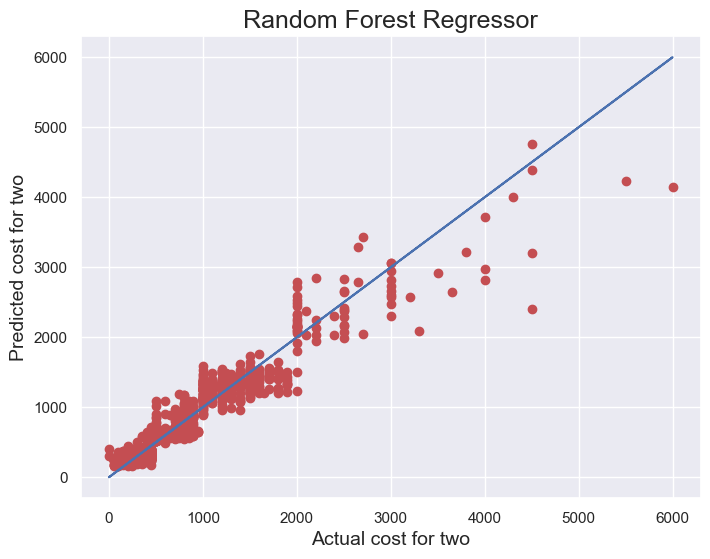

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual cost for two',fontsize= 14)
plt.ylabel('Predicted cost for two',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()

### Prediction

In [102]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(40)

,Expected,Predicted
5822,1900,1388.214219
6640,600,611.126019
3606,200,242.429765
6990,300,348.666285
8466,450,384.947403
1111,200,257.622646
7645,400,259.335369
1472,800,963.060015
6448,1000,1331.236030
8461,1600,1430.535360


### Model Saving

In [103]:
import pickle
filename = 'zomato_average_cost_for_two.pkl'
pickle.dump(rf,open(filename, 'wb'))

## Conclusion - We have Solved both the problem Statements by Model Building